In [ ]:
# KMeans
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

data = pd.read_csv('./Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
X = data[['EstimatedSalary']]
y = data['Age']

In [17]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [18]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, random_state=0)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

inertia

[400.0,
 144.84614574260678,
 51.29785089171938,
 37.58704518703795,
 17.23154750485619,
 12.787586344046234,
 8.892572656967399,
 7.469161801850498,
 5.8458382451729625,
 4.560750299067285]

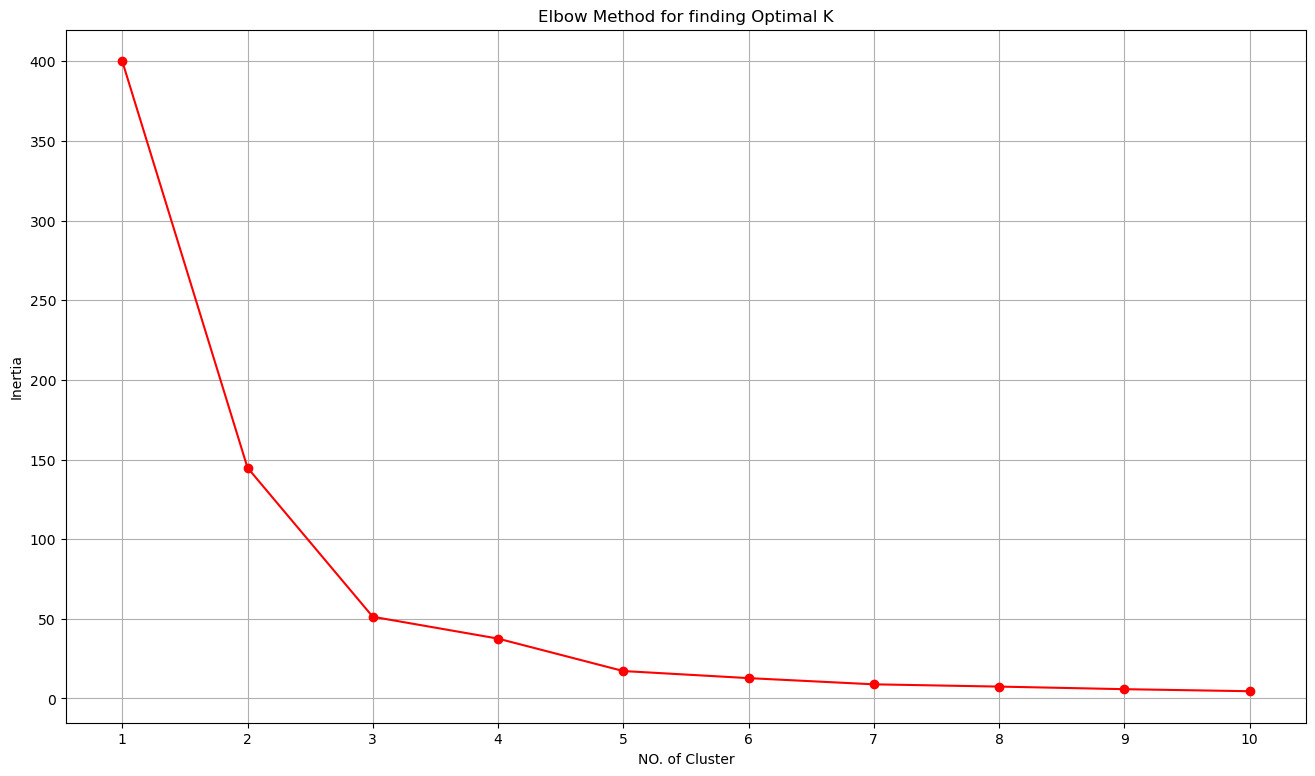

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.title('Elbow Method for finding Optimal K')
plt.xlabel('NO. of Cluster')
plt.ylabel('Inertia')
plt.plot(range(1,11), inertia, marker='o', color='r')
plt.grid()
plt.xticks(range(1,11))
plt.show()

In [20]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_scaled)
labels

array([2, 2, 4, 4, 1, 4, 1, 0, 2, 4, 1, 4, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 2, 1, 0, 2, 4, 1, 2, 2, 4, 1, 2, 2, 4, 3, 2,
       1, 2, 1, 4, 0, 1, 2, 4, 1, 2, 4, 4, 4, 1, 2, 3, 2, 1, 4, 3, 1, 4,
       2, 1, 4, 1, 1, 2, 2, 3, 2, 3, 4, 2, 1, 2, 1, 4, 4, 1, 4, 3, 4, 1,
       1, 4, 1, 3, 2, 2, 1, 4, 2, 3, 1, 2, 1, 4, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 2, 2, 1, 4, 2,
       1, 1, 4, 4, 1, 3, 4, 2, 1, 1, 4, 1, 2, 1, 3, 2, 4, 1, 2, 4, 1, 4,
       4, 2, 4, 1, 2, 0, 3, 1, 2, 2, 1, 1, 4, 1, 0, 4, 1, 3, 3, 4, 1, 2,
       4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 4, 1, 2, 1, 2, 4, 1, 1, 4, 1, 2,
       1, 2, 2, 1, 0, 1, 3, 4, 0, 3, 0, 2, 3, 0, 4, 4, 4, 3, 4, 1, 3, 0,
       1, 1, 0, 3, 4, 4, 0, 0, 1, 1, 0, 4, 3, 1, 3, 1, 4, 1, 1, 0, 0, 4,
       1, 3, 1, 0, 4, 3, 4, 3, 2, 4, 0, 0, 4, 1, 1, 4, 3, 0, 1, 0, 0, 1,
       1, 3, 1, 1, 0, 4, 0, 1, 4, 3, 2, 1, 1, 1, 2, 2, 1, 4, 1, 2, 0, 1,
       4, 0, 1, 1, 0, 1, 2, 1, 4, 4, 1, 3, 1, 3, 2,

In [21]:
centroids = km.cluster_centers_
centroids

array([[ 2.01596309],
       [ 0.27445011],
       [-1.25884018],
       [ 1.15415666],
       [-0.46988937]])

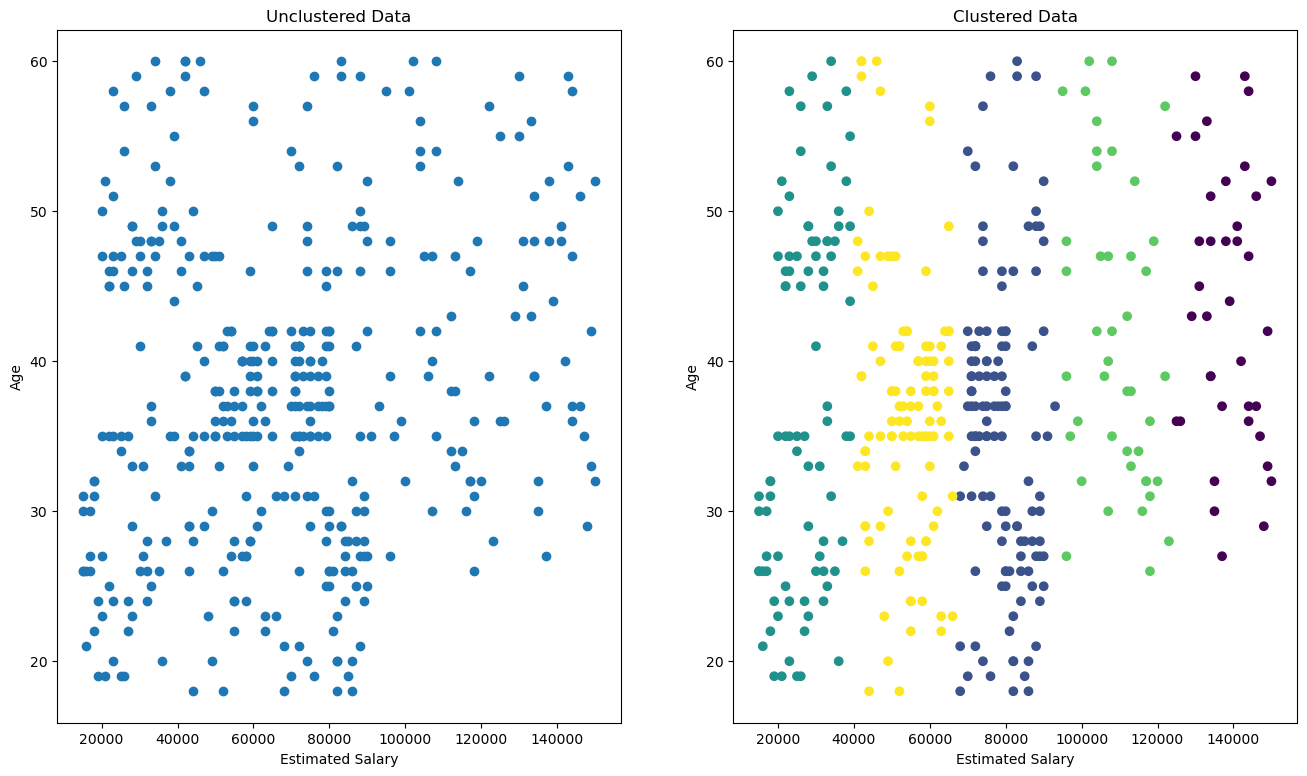

In [22]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.scatter(X, y)

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.scatter(X, y, c=labels)